## Predict Tinder Matches

We are going to make a recommender algorithm that recommends profiles to people based on their similar interests so we will aim to predict the profiles to the user such that the user finds it most interesting out of all and tries to connect with them

Reference: https://www.geeksforgeeks.org/predict-tinder-matches-with-machine-learning/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tinder_data = pd.read_csv("../data/tinder_data.csv")

In [3]:
type(tinder_data)

pandas.core.frame.DataFrame

In [4]:
tinder_data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,same city


In [5]:
tinder_data.shape

(2001, 20)

In [6]:
tinder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

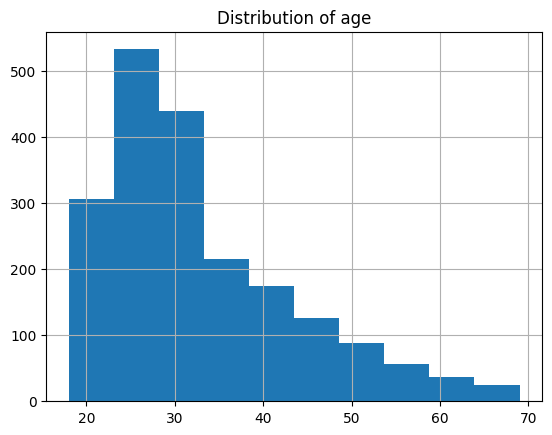

In [7]:
# get to the know the data
# distribution of age

tinder_data.age.hist()
plt.title("Distribution of age");


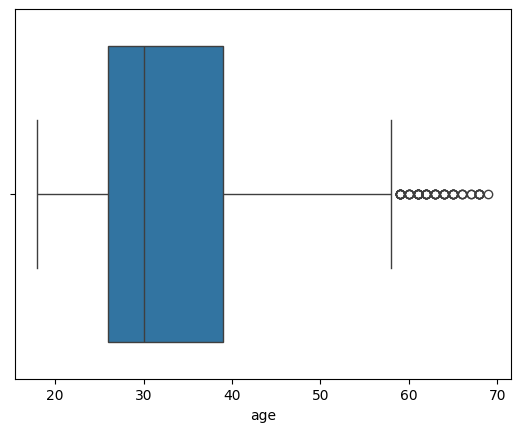

In [8]:
sns.boxplot(x=tinder_data.age);

# ages above 60 are considered outliers - we may consider filtering based on age

In [9]:
# distribution of status

tinder_data.status.value_counts()

status
single            1867
available           66
seeing someone      54
married             14
Name: count, dtype: int64

In [10]:

tinder_data.status.value_counts(normalize=True)

status
single            0.933033
available         0.032984
seeing someone    0.026987
married           0.006997
Name: proportion, dtype: float64

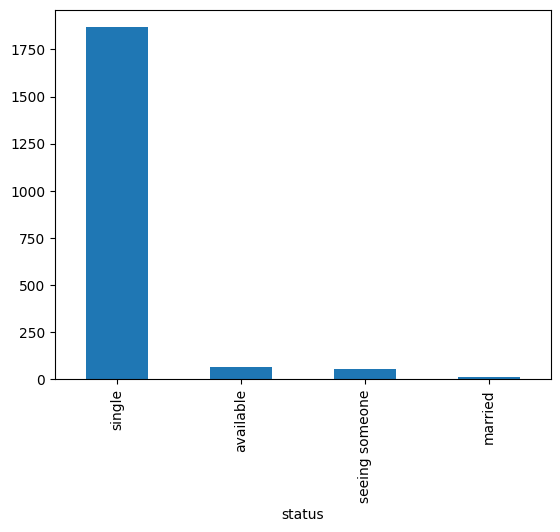

In [11]:
tinder_data.status.value_counts().plot(kind='bar');

In [14]:
# the bio for the 6th profile

tinder_data.bio[5]

"my self-summary..well i'm not very good at this, so lets give it a try..i can be really shy but outgoing once i warm up to the person or situation. would say that life is good..it has its ups and downs but that's what makes life interesting. i love to have fun but also love just relaxing..i'm a little clumsy but i always put all of it. i enjoy listening to all sorts of music and watching movies...to be continued"

In [15]:
# the bio for the 1st profile

tinder_data.bio[0]

"bottom line i love life! i work hard and i love hard! i'm down to earth... drama free and plan to keep it that way... if you want to know more about me just ask! i'm a woman with loves other women!. sometimes you feel like a nut sometimes you don't... i have a femme side and a butch side. i love trying new things. i spend my day helping people so i can check that off the list. i'm very out going and i love making people laugh! i'm open to meeting new people and dating. at this point i'm taking care of my heart and not rushing anything. i value communication and being open-minded."

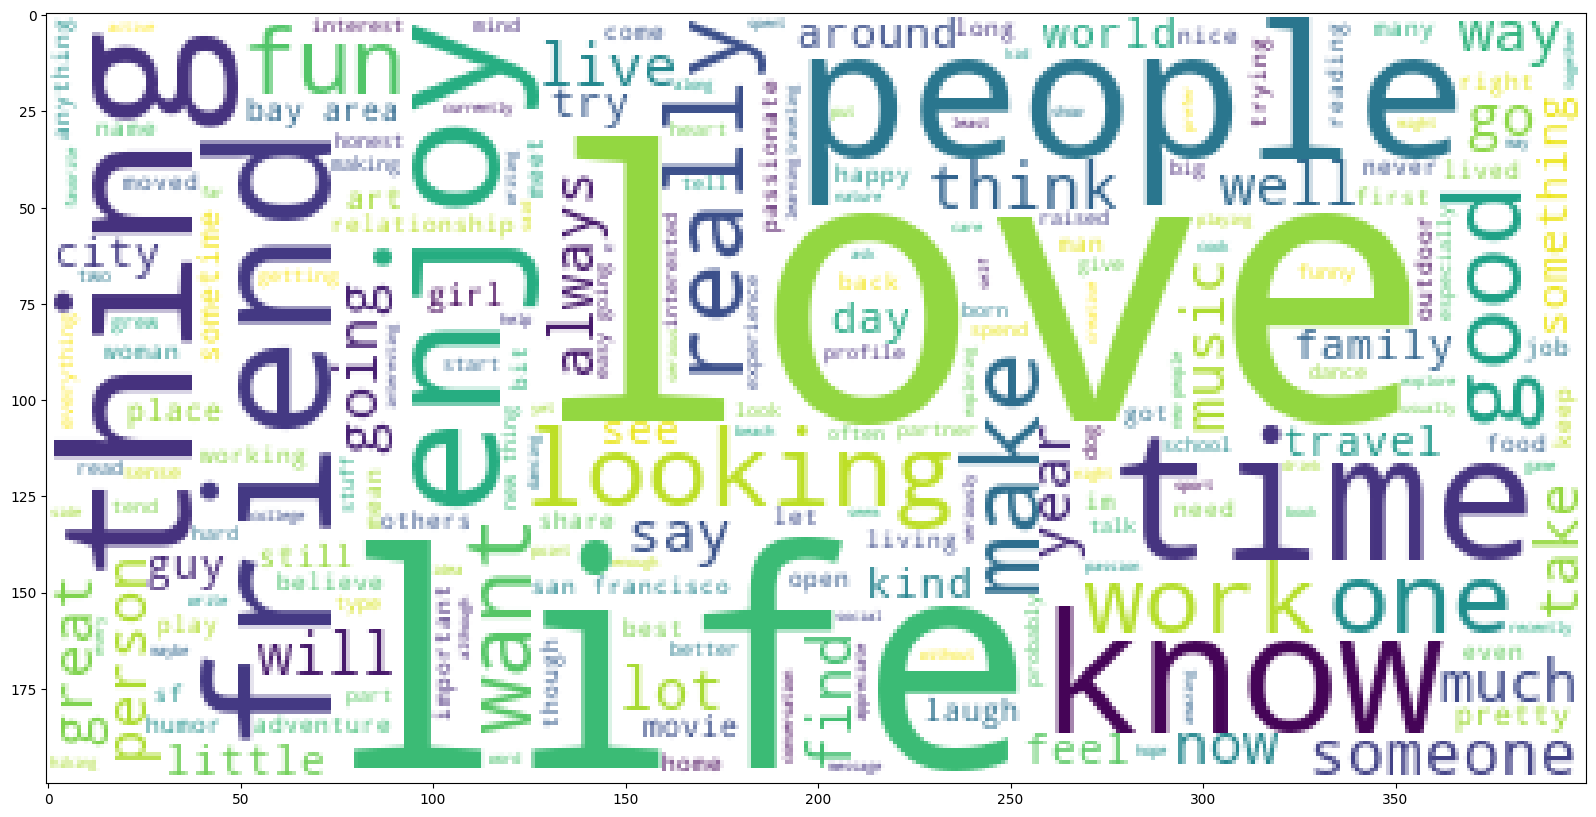

In [13]:
# view the most appearing words

import re
from wordcloud import WordCloud

# Remove punctuation
tinder_data['bio_proc'] = \
tinder_data['bio'].map(lambda x: re.sub('[,.!?]', '', x))

# Convert all the words to lowercase
tinder_data['bio_proc'] = \
tinder_data['bio_proc'].map(lambda x: x.lower())


# Join the different processed bios together.
long_string = ','.join(list(tinder_data['bio_proc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show();

In [ ]:
# check for missing data

tinder_data.isnull().sum()

In [ ]:
# check for duplicate data

tinder_data.duplicated().sum()